<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.869 - TFM-Minería de datos y machine learning</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencias de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Rubén Salamanqués Ballesteros</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# PEC 3: Diseño e Implementación. Mantenimiento predictivo.

Se importan las bibliotecas generales que se usarán en el tratamiento de datos.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Carga y preparación de los datos

En este apartado se cargarán los datos disponibles para generar los conjuntos necesarios para la creación del modelo predictivo. A continuación se analizarán los datos cargados para realizar tareas de preproceso si fuesen necesarias.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Carga del conjunto <strong>Datos</strong> que contiene los datos de operación de la máquina estudiada.
</div>


In [2]:
Datos = pd.read_excel("./predictive-maintenance1/feature.xlsx", header=[0,1])

Muestra de columnas del conjunto cargado.

In [3]:
print(Datos.iloc[:,[0,1,2,27,28,53,54,79,80,105,106]].head(3))
print(Datos.iloc[:,[0,1,2,27,28,53,54,79,80,105,106]].tail(3))

  Unnamed: 0_level_0     count                 max                 min  \
                date 136088194 136088202 136088194 136088202 136088194   
0         2015-05-03         0         0       NaN       NaN       NaN   
1         2015-05-04         0         0       NaN       NaN       NaN   
2         2015-05-05         0         0       NaN       NaN       NaN   

                 mean                 std            
  136088202 136088194 136088202 136088194 136088202  
0       NaN       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN       NaN  
2       NaN       NaN       NaN       NaN       NaN  
    Unnamed: 0_level_0     count                 max                 min  \
                  date 136088194 136088202 136088194 136088202 136088194   
980         2018-01-15         5         0    5174.0       NaN    1921.0   
981         2018-01-16        23         0   84349.0       NaN   18915.0   
982         2018-01-17         6         0    7147.0   

Información del conjunto cargado.

In [4]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Columns: 131 entries, (Unnamed: 0_level_0, date) to (std, 136676754)
dtypes: datetime64[ns](1), float64(104), int64(26)
memory usage: 1013.7 KB


Se rellenan los valores nulos (NaN) con ceros para poder utilizar todas las columnas en el entrenamiento del modelo de predicción.

In [5]:
Datos = Datos.fillna(0)
print(Datos.iloc[:,[0,1,2,27,28,53,54,79,80,105,106]].head(3))
print(Datos.iloc[:,[0,1,2,27,28,53,54,79,80,105,106]].tail(3))

  Unnamed: 0_level_0     count                 max                 min  \
                date 136088194 136088202 136088194 136088202 136088194   
0         2015-05-03         0         0       0.0       0.0       0.0   
1         2015-05-04         0         0       0.0       0.0       0.0   
2         2015-05-05         0         0       0.0       0.0       0.0   

                 mean                 std            
  136088202 136088194 136088202 136088194 136088202  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
    Unnamed: 0_level_0     count                 max                 min  \
                  date 136088194 136088202 136088194 136088202 136088194   
980         2018-01-15         5         0    5174.0       0.0    1921.0   
981         2018-01-16        23         0   84349.0       0.0   18915.0   
982         2018-01-17         6         0    7147.0   

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Carga del conjunto <strong>Label_train</strong> que contiene las fechas y las etiquetas que indican si la máquina ha sufrido error o no.
</div>
 

In [6]:
Label_train = pd.read_csv("./predictive-maintenance1/train_label.csv")

print(Label_train.head(5))
print(Label_train.tail(5))

       date  label
0  3/5/2015    NaN
1  4/5/2015    0.0
2  5/5/2015    0.0
3  6/5/2015    0.0
4  7/5/2015    0.0
          date  label
679  20/3/2017    0.0
680  21/3/2017    0.0
681  22/3/2017    0.0
682  23/3/2017    1.0
683  24/3/2017    1.0


Información del conjunto cargado.

In [7]:
Label_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
date     684 non-null object
label    683 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Carga del conjunto <strong>Label_test</strong> que contiene las fechas y las predicciones expresadas como probabilidad de error. En este conjunto están las fechas posteriores a las contenidas en el conjunto de etiquetas anteriormente cargado.
</div>
 

In [8]:
Label_test = pd.read_csv("./predictive-maintenance1/test_label_sample.csv")

print(Label_test.head(5))
print(Label_test.tail(5))

        date     label
0  25/3/2017  0.130578
1  26/3/2017  0.124545
2  27/3/2017  0.111402
3  28/3/2017  0.115621
4  29/3/2017  0.071451
          date     label
295  14/1/2018  0.000136
296  15/1/2018  0.018140
297  16/1/2018  0.120146
298  17/1/2018  0.233896
299  18/1/2018  0.089933


Información del conjunto cargado.

In [9]:
Label_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
date     300 non-null object
label    300 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


Como las predicciones de un día se realizarán con los datos de operación del día anterior, el primer registro del conjunto de etiquetas **Label_train** tiene valor nulo por no disponer de los datos de operación del día anterior en el conjunto **Datos**. Se elimina ese primer registro para que más adelante la primera fila de **Datos** se corresponda con la segunda fila (que pasará a ser la primera) de **Label_train**.

In [10]:
Label_train = Label_train.drop(0) #Se elimina la fila con índice 0
Label_train.head(5)

,date,label
1,4/5/2015,0.0
2,5/5/2015,0.0
3,6/5/2015,0.0
4,7/5/2015,0.0
5,8/5/2015,0.0


Se divide el conjunto **Datos** en **Datos_train** como conjunto de entrenamiento y **Datos_test** como conjunto de comprobación.

In [11]:
Datos_train = Datos.head(683) #683 primeras filas para el conjunto de 
                              #entrenamiento
Datos_test = Datos.tail(300) #300 últimas filas para el conjunto de test

In [12]:
print("Dimensiones del conjunto Datos_train: "+str(Datos_train.shape))
print("Dimensiones del conjunto Label_train: "+str(Label_train.shape))
print("Dimensiones del conjunto Datos_test: "+str(Datos_test.shape))
print("Dimensiones del conjunto Label_test: "+str(Label_test.shape))

Dimensiones del conjunto Datos_train: (683, 131)
Dimensiones del conjunto Label_train: (683, 2)
Dimensiones del conjunto Datos_test: (300, 131)
Dimensiones del conjunto Label_test: (300, 2)


## 2. Creación de modelos predictivos

En este apartado se generarán distintos modelos predictivos hasta obtener uno que arroje un buen nivel de predicciones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Carga de las bibliotecas necesarias para la generación de modelos de regresión logística y para su evaluación.
</div>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

### 2.1. Modelo de clasificación

Se crea un modelo de clasificación por regresión logística que utiliza todas las variables disponibles en los conjuntos de datos a excepción de las columnas con las fechas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se eliminan las columnas de fechas.
</div>

In [14]:
#Se eliminan las columnas de las fechas
Datos_train = Datos_train.drop(('Unnamed: 0_level_0','date'), axis=1)
Datos_test = Datos_test.drop(('Unnamed: 0_level_0','date'), axis=1)
Label_train = Label_train.drop('date', axis=1)
Label_test = Label_test.drop('date', axis=1)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se crea el modelo y se obtienen las predicciones.
</div>

In [15]:
model = LogisticRegression() #Creación del modelo
model.fit(Datos_train, Label_train['label']) #Ajuste a los datos
Label_predict = model.predict_proba(Datos_test) #Obtención de predicciones

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se evalúan las predicciones.
</div>

In [16]:
#Cálculo de la AUC según la segunda columna de las predicciones,
#la que representa la probabilidad de un fallo.
#Las etiquetas de test se redondean a entero para poder obtener 
#la puntuación
roc_auc = roc_auc_score(Label_test.round(), Label_predict[:,1])
roc_auc

0.38064094179202096

### 2.2. Reducción de variables de entrada

El resultado del modelo anterior ha sido muy pobre, como la mayoría de las variables de entrada tienen el valor cero se va a generar un nuevo modelo teniendo en cuenta únicamente los datos de las columnas bajo la categoría **count**.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se obtienen nuevos conjuntos de entrenamiento y test solo con las columnas de <strong>count</strong>.
</div>

In [17]:
#Los nuevos conjuntos tienen las mismas filas que los anteriores
#pero solo las columnas bajo la categoría 'count'
Datos_train_count = Datos_train.iloc[:,0:26]
Datos_test_count = Datos_test.iloc[:,0:26]

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se crea el modelo y se obtienen las predicciones.
</div>

In [18]:
model_count = LogisticRegression() #Creación del modelo
model_count.fit(Datos_train_count, Label_train['label']) #Ajuste a los datos
Label_predict_count = model_count.predict_proba(Datos_test_count) #Obtención de predicciones

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se evalúan las predicciones.
</div>

In [19]:
roc_auc_count = roc_auc_score(Label_test.round(), Label_predict_count[:,1])
roc_auc_count

0.5322105951602355

### 2.3. Reducción PCA

El modelo anterior ha mejorado los resultados en comparación con el primero pero sigue teniendo un nivel muy pobre de predicción. En este apartado se va a generar un modelo con la técnica de reducción de la dimensionalidad PCA.

Se generarán varios modelos, cada uno de ellos con un número distinto de componentes PCA, evaluando todos ellos para elegir el mejor.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se crean varios modelos que van desde 3 a 25 componentes PCA, se evalúan y guardan sus resulados.
</div>

In [20]:
from sklearn.decomposition import PCA #Permite aplicar la reducción PCA

lista_auc = [] #Lista donde se guardarán los resultados
print('Puntuación AUC para reducción PCA con ')
for i in np.arange(3,26):
    pca = PCA(n_components=i) #Objeto PCA, se indican los componentes finales
    pca_fit = pca.fit(Datos_train_count) #Ajuste a los datos de entrada
    Datos_train_pca = pca_fit.transform(Datos_train_count) #Entrenamiento
    Datos_test_pca = pca_fit.transform(Datos_test_count) #Test
    model_pca = LogisticRegression() #Creación del modelo
    model_pca.fit(Datos_train_pca, Label_train['label']) #Ajuste a los datos
    Label_predict_pca = model_pca.predict_proba(Datos_test_pca) #Predicciones
    #Puntuación AUC
    roc_auc_pca = roc_auc_score(Label_test.round(), Label_predict_pca[:,1])
    lista_auc.append([i,roc_auc_pca]) #Se guardan los resultados en una lista
    print(str(i)+' componentes: '+str(roc_auc_pca.round(5)))    

Puntuación AUC para reducción PCA con 
3 componentes: 0.06426
4 componentes: 0.01815
5 componentes: 0.01815
6 componentes: 0.52632
7 componentes: 0.53123
8 componentes: 0.53434
9 componentes: 0.52796
10 componentes: 0.59778
11 componentes: 0.59892
12 componentes: 0.54022
13 componentes: 0.543
14 componentes: 0.55347
15 componentes: 0.55674
16 componentes: 0.5654
17 componentes: 0.62884
18 componentes: 0.60742
19 componentes: 0.98823
20 componentes: 0.71207
21 componentes: 0.54022
22 componentes: 0.54382
23 componentes: 0.54725
24 componentes: 0.54464
25 componentes: 0.5448


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se representan los resultados obtenidos en un gráfico.
</div>

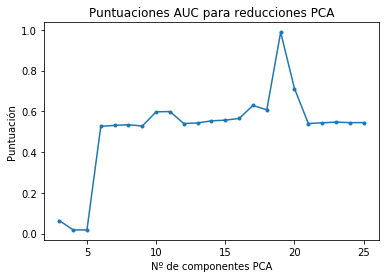

In [21]:
#Se transforma la lista en una matriz
matriz_auc = np.array(lista_auc)

#Se representan los resultados
plt.figure()
plt.title("Puntuaciones AUC para reducciones PCA")
plt.xlabel("Nº de componentes PCA")
plt.ylabel("Puntuación")
plt.plot(matriz_auc[:,0],matriz_auc[:,1], marker='.')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se obtiene el modelo final basándose en los resultados analizados. Tendrá 19 componentes PCA.
</div>

In [22]:
pca = PCA(n_components=19) #Objeto PCA, se indican los componentes finales
pca_fit = pca.fit(Datos_train_count) #Ajuste a los datos de entrada
Datos_train_pca = pca_fit.transform(Datos_train_count) #Entrenamiento
Datos_test_pca = pca_fit.transform(Datos_test_count) #Test
model_pca_final = LogisticRegression() #Creación del modelo
model_pca_final.fit(Datos_train_pca, Label_train['label']) #Ajuste a los datos
Label_predict_pca = model_pca_final.predict_proba(Datos_test_pca) #Predicciones

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se representa la curva ROC de los resultados del modelo final.
</div>

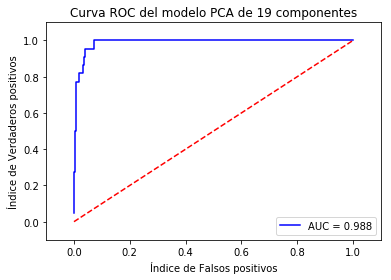

In [23]:
#Bibliotecas para dibujar la curva ROC
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#Cáclulo de la curva ROC
fpr, tpr, threshold = roc_curve(Label_test.round(), Label_predict_pca[:,1])
roc_auc = auc(fpr, tpr) #Evaluación

#Parámetros para el gráfico
plt.title('Curva ROC del modelo PCA de 19 componentes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('Índice de Verdaderos positivos')
plt.xlabel('Índice de Falsos positivos')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se generan las predicciones en formato de doble columna, fecha y probabilidad de fallo.
</div>

In [29]:
#Creación del conjunto de datos con los resultados
fechas_pred = pd.date_range(start='25/03/2017', end='18/01/2018')

resultados = pd.DataFrame({'date': fechas_pred, 'label': Label_predict_pca[:,1]})
print(resultados.head(5))
print(resultados.tail(5))
print("Dimensiones del conjunto de resultados: "+str(resultados.shape))

        date     label
0 2017-03-25  0.112550
1 2017-03-26  0.132014
2 2017-03-27  0.103643
3 2017-03-28  0.104041
4 2017-03-29  0.054267
          date     label
295 2018-01-14  0.190410
296 2018-01-15  0.729381
297 2018-01-16  0.162552
298 2018-01-17  0.528244
299 2018-01-18  0.221256
Dimensiones del conjunto de resultados: (300, 2)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Se exportan las predicciones a formato CSV.
</div>

In [25]:
#Exportación a .csv
resultados.to_csv("./predictive-maintenance1/resultados.csv", index=False)